In [100]:
import pandas as pd
import numpy as np
import random
from sklearn import ensemble 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xg 
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

In [101]:
spotify = pd.read_csv('taylor_swift_spotify.csv',encoding='latin-1',index_col=0)
spotify.sort_values(by=['release_date'], inplace=True, ascending=True)

In [102]:
spotify.head(530)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
529,Teardrops on My Guitar - Pop Version,Taylor Swift,2006-10-24,15,4pJi1rVt9GNegU9kywjg4z,spotify:track:4pJi1rVt9GNegU9kywjg4z,0.04020,0.459,0.753,0.000000,0.0863,-3.827,0.0537,199.997,0.483,57,179066
515,Tim McGraw,Taylor Swift,2006-10-24,1,0Om9WAB5RS09L80DyOfTNa,spotify:track:0Om9WAB5RS09L80DyOfTNa,0.57500,0.580,0.491,0.000000,0.1210,-6.462,0.0251,76.009,0.425,68,232106
516,Picture To Burn,Taylor Swift,2006-10-24,2,32mVHdy0bi1XKgr0ajsBlG,spotify:track:32mVHdy0bi1XKgr0ajsBlG,0.17300,0.658,0.877,0.000000,0.0962,-2.098,0.0323,105.586,0.821,72,173066
517,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,2006-10-24,3,7zMcNqs55Mxer82bvZFkpg,spotify:track:7zMcNqs55Mxer82bvZFkpg,0.28800,0.621,0.417,0.000000,0.1190,-6.941,0.0231,99.953,0.289,69,203040
518,A Place in this World,Taylor Swift,2006-10-24,4,73OX8GdpOeGzKC6OvGSbsv,spotify:track:73OX8GdpOeGzKC6OvGSbsv,0.05100,0.576,0.777,0.000000,0.3200,-2.881,0.0324,115.028,0.428,60,199200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Suburban Legends (Taylor's Version) (From The ...,1989 (Taylor's Version) [Deluxe],2023-10-27,20,6M9ppdfFjR1AbpUl3Y8DcV,spotify:track:6M9ppdfFjR1AbpUl3Y8DcV,0.20700,0.701,0.625,0.000000,0.1050,-8.804,0.0360,118.036,0.323,81,171818
20,Is It Over Now? (Taylor's Version) (From The V...,1989 (Taylor's Version) [Deluxe],2023-10-27,21,6IG3sQ8s9nfk6TUlVzRhbN,spotify:track:6IG3sQ8s9nfk6TUlVzRhbN,0.04100,0.595,0.656,0.000000,0.1220,-7.343,0.0370,99.994,0.191,84,229477
21,Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...,1989 (Taylor's Version) [Deluxe],2023-10-27,22,6qAcApH8obo8eqatCKUHd9,spotify:track:6qAcApH8obo8eqatCKUHd9,0.01040,0.602,0.648,0.000000,0.2170,-6.905,0.1030,170.091,0.174,83,199773
11,I Know Places (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,12,1ULabO0PEsdJekqVH6G10G,spotify:track:1ULabO0PEsdJekqVH6G10G,0.09990,0.582,0.788,0.000000,0.1150,-5.358,0.0445,160.027,0.652,78,195700


In [103]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 529 to 0
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   release_date      530 non-null    object 
 3   track_number      530 non-null    int64  
 4   id                530 non-null    object 
 5   uri               530 non-null    object 
 6   acousticness      530 non-null    float64
 7   danceability      530 non-null    float64
 8   energy            530 non-null    float64
 9   instrumentalness  530 non-null    float64
 10  liveness          530 non-null    float64
 11  loudness          530 non-null    float64
 12  speechiness       530 non-null    float64
 13  tempo             530 non-null    float64
 14  valence           530 non-null    float64
 15  popularity        530 non-null    int64  
 16  duration_ms       530 non-null    int64  
dtypes:

In [104]:
spotify.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,11.184906,0.319247,0.585285,0.574609,0.004005,0.163492,-7.505434,0.055889,122.332311,0.397379,64.852830,239978.624528
std,7.981060,0.327043,0.113121,0.191565,0.033163,0.142263,2.939040,0.070300,30.000272,0.199589,15.414532,46119.983031
min,1.000000,0.000184,0.243000,0.118000,0.000000,0.035700,-17.932000,0.023100,68.097000,0.037400,33.000000,83253.000000
25%,5.000000,0.036250,0.516000,0.443000,0.000000,0.096600,-9.222000,0.030325,96.939500,0.230000,52.000000,211813.000000
50%,10.000000,0.165000,0.595500,0.589500,0.000002,0.115000,-7.012000,0.037300,119.030000,0.385500,69.000000,235273.000000
75%,15.000000,0.653000,0.653000,0.729750,0.000056,0.163000,-5.361750,0.055225,143.934250,0.535000,77.000000,260361.000000
max,46.000000,0.971000,0.897000,0.950000,0.488000,0.931000,-1.909000,0.912000,208.918000,0.943000,100.000000,613026.000000


<Axes: xlabel='popularity', ylabel='Count'>

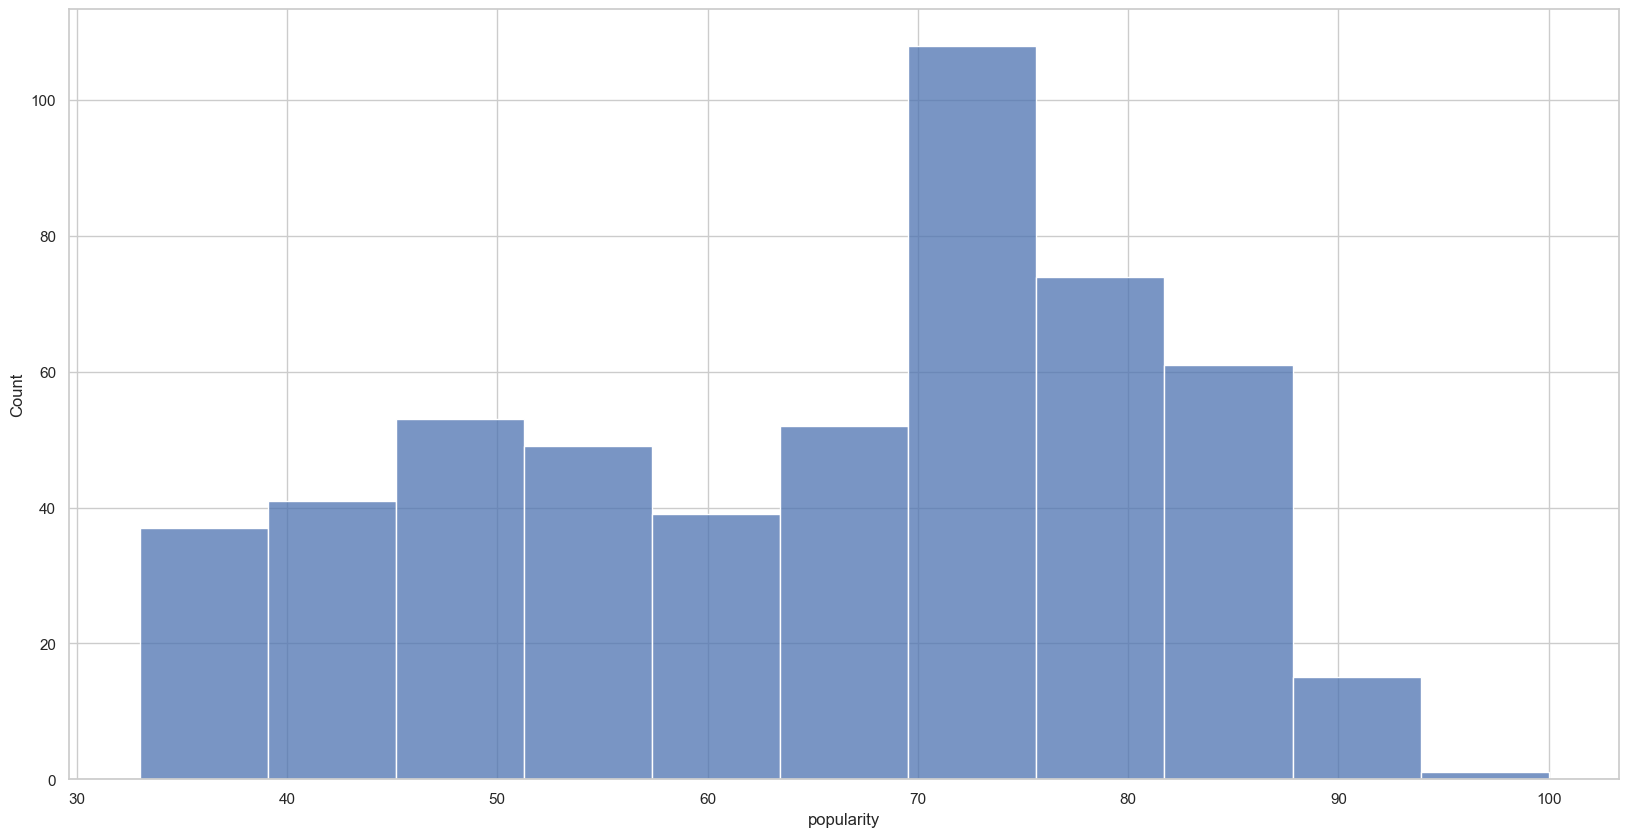

In [105]:
plt.figure(figsize=(20, 10))
sns.histplot(spotify["popularity"],bins='auto')

<Axes: >

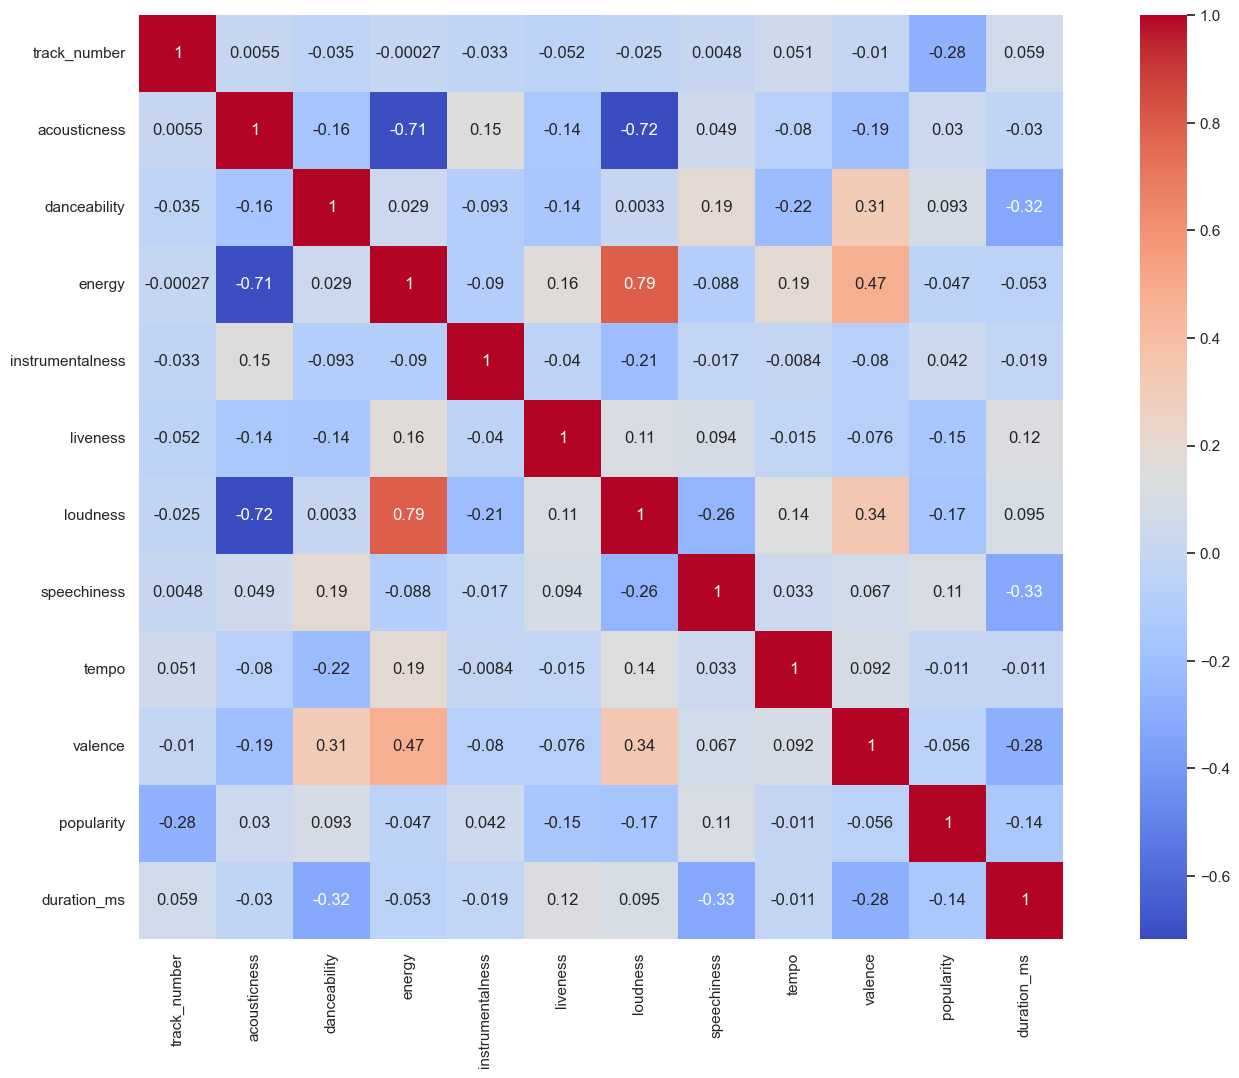

In [106]:
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
spotify_cleaned = spotify.dropna()
numeric_columns = spotify_cleaned.select_dtypes(include='number')
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)

In [107]:
spotify['album'].value_counts()

album
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
1989 (Taylor's Version) [Deluxe]                                                       22
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
1989 (Taylor's Version)                                                                21
Speak Now (Deluxe Edition)                                                             20
Midnights (3am Edition)                                                                20
Fear

Text(0.5, 1.0, 'Cleaned Popularity')

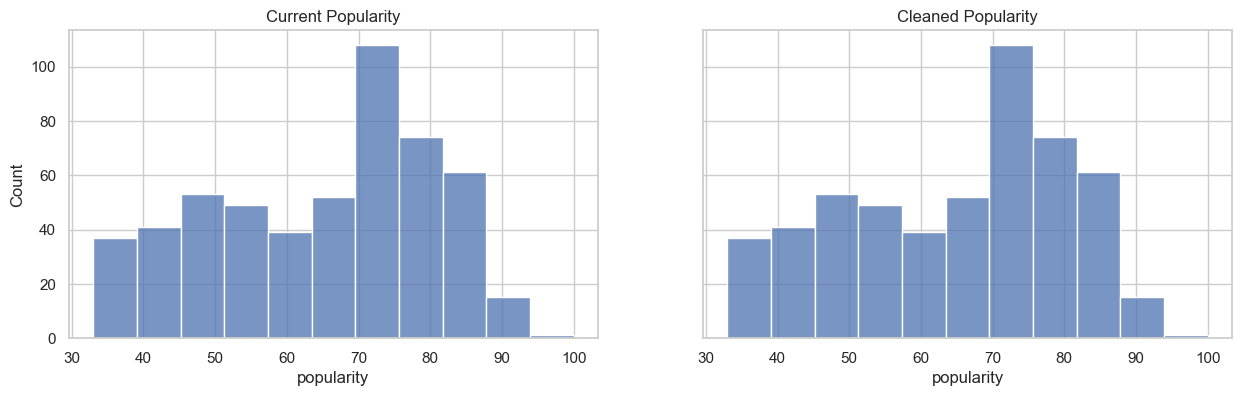

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)
sns.histplot(spotify["popularity"],bins='auto', ax=axes[0])
sns.histplot(spotify["popularity"],bins='auto', ax=axes[1])
axes[0].set_title('Current Popularity')
axes[1].set_title('Cleaned Popularity')

In [109]:
spotify = spotify_cleaned

spotify['album'].value_counts()

album
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
1989 (Taylor's Version) [Deluxe]                                                       22
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
1989 (Taylor's Version)                                                                21
Speak Now (Deluxe Edition)                                                             20
Midnights (3am Edition)                                                                20
Fear

Text(0.5, 1.0, 'Releasing Year')

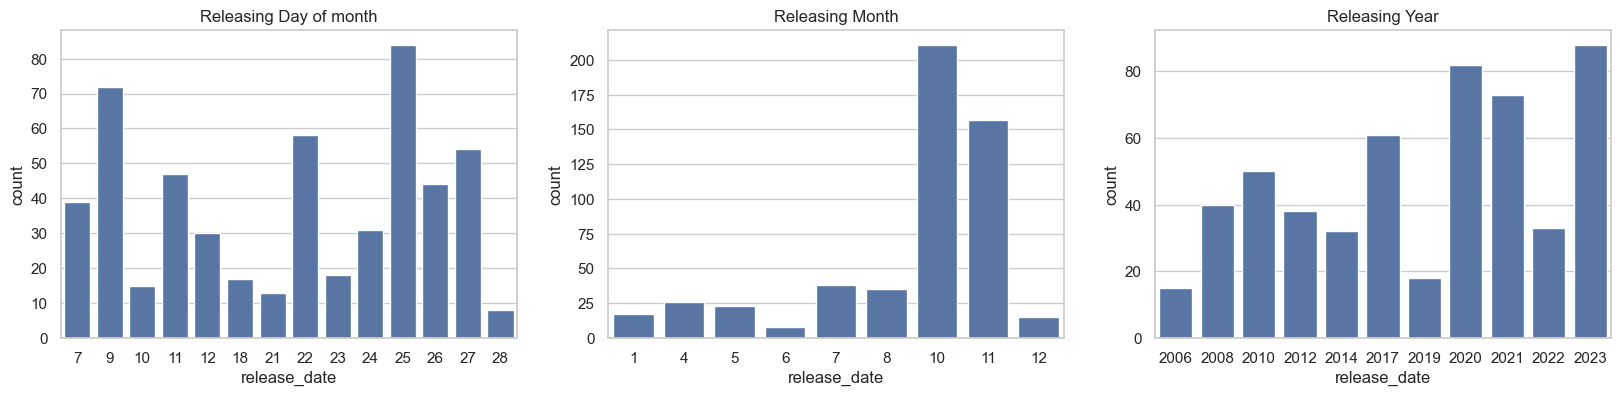

In [113]:
spotify['release_date'] = pd.to_datetime(spotify['release_date'])
release_day_of_month = spotify['release_date'].dt.day
release_month = spotify['release_date'].dt.month
release_year = spotify['release_date'].dt.year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4), sharey=False)
sns.countplot(x=release_day_of_month, ax=axes[0])
sns.countplot(x=release_month, ax=axes[1])
sns.countplot(x=release_year, ax=axes[2])
axes[0].set_title('Releasing Day of month')
axes[1].set_title('Releasing Month')
axes[2].set_title('Releasing Year')


In [117]:
df = pd.DataFrame(spotify.drop(columns=['name', 'id', 'uri']))

In [120]:
ohe_album = pd.get_dummies(df['album'])

In [122]:
Cuurent_features = pd.DataFrame({
    'track_number' : spotify['track_number'],
    'acousticness' : spotify['acousticness'],
    'danceability' : spotify['danceability'],
    'energy' : spotify['energy'],
    'instumentalness' : spotify['instrumentalness'],
    'liveness' : spotify['liveness'],
    'loudness' : spotify['loudness'],
    'speechiness' : spotify['speechiness'],
    'tempo' : spotify['tempo'],
    'valence' : spotify['valence'],
    'duration_ms' : spotify['duration_ms'],
    'day_of_month' : release_day_of_month,
    'month_of_release' : release_month,
    'year_of_release': release_year
})

In [129]:
final_df = pd.concat([Cuurent_features, ohe_album], axis=1)

In [130]:
final_df.columns = final_df.columns.str.replace(' ', '_')

In [132]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 529 to 0
Data columns (total 41 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   track_number                                                                         530 non-null    int64  
 1   acousticness                                                                         530 non-null    float64
 2   danceability                                                                         530 non-null    float64
 3   energy                                                                               530 non-null    float64
 4   instumentalness                                                                      530 non-null    float64
 5   liveness                                                                             530 non-null

In [134]:
X_train, X_test, y_train, y_test = train_test_split(final_df, spotify['popularity'], test_size=0.1, random_state=42)

In [135]:
print("Length of the X_train:", X_train.shape)
print("Length of the y_train:", y_train.shape)
print("Length of the X_test:", X_test.shape)
print("Length of the y_test:", y_test.shape)

Length of the X_train: (477, 41)
Length of the y_train: (477,)
Length of the X_test: (53, 41)
Length of the y_test: (53,)


In [137]:
names, mses, rmses, r2s = [], [], [], []

In [138]:
def display_metrics(y_test, y_preds, model_type):
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    result = f'''
    {model_type} MSE  : {mse}
    {model_type} RMSE : {rmse} 
    {model_type} R^2  : {r2}
    '''
    
    names.append(model_type)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    
    print(result)

In [139]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [141]:
display_metrics(y_test, lr_preds, "Linear Regression")


    Linear Regression MSE  : 25.926199928856956
    Linear Regression RMSE : 5.091777678655752 
    Linear Regression R^2  : 0.9012923581121233
    


In [142]:
elr = ElasticNet(alpha=0.1, random_state=42)
elr.fit(X_train, y_train)
elr_preds = elr.predict(X_test)

In [143]:
display_metrics(y_test, elr_preds, "Elastic Net Regression")


    Elastic Net Regression MSE  : 86.80851594425454
    Elastic Net Regression RMSE : 9.317108776023522 
    Elastic Net Regression R^2  : 0.6694978852220366
    


In [144]:
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)

In [146]:
display_metrics(y_test, svr_preds, "Support Vector Regressor")


    Support Vector Regressor MSE  : 253.28248320828553
    Support Vector Regressor RMSE : 15.914851026895775 
    Support Vector Regressor R^2  : 0.035689120750453496
    


In [147]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_preds = dtr.predict(X_test)

In [148]:
display_metrics(y_test, dtr_preds, "Decision Tree Regressor")


    Decision Tree Regressor MSE  : 66.54716981132076
    Decision Tree Regressor RMSE : 8.157644869159283 
    Decision Tree Regressor R^2  : 0.7466379868853703
    


In [149]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)

In [150]:
display_metrics(y_test, rfr_preds, "Random Forest Regressor")


    Random Forest Regressor MSE  : 25.536435849056595
    Random Forest Regressor RMSE : 5.053358868025958 
    Random Forest Regressor R^2  : 0.9027762891670124
    


In [152]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
                else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<')))
                else col for col in X_test.columns.values]

In [153]:
xgb = xg.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [154]:
display_metrics(y_test, xgb_preds, "XGB Regressor")


    XGB Regressor MSE  : 28.154432933036794
    XGB Regressor RMSE : 5.306075096814668 
    XGB Regressor R^2  : 0.8928089079334288
    


In [155]:
params = {'n_estimators': 660,
            'max_depth': 3,
            'min_samples_split': 3,
            'min_samples_leaf': 2,
            'learning_rate': 0.01
        }
gbd_reg = ensemble.GradientBoostingRegressor(**params)
gbd_reg.fit(X_train, y_train)
gbd_preds = gbd_reg.predict(X_test)

In [156]:
display_metrics(y_test, gbd_preds, "Gradient Boosting Descent")


    Gradient Boosting Descent MSE  : 27.54666496485828
    Gradient Boosting Descent RMSE : 5.2484916847469885 
    Gradient Boosting Descent R^2  : 0.8951228352779107
    


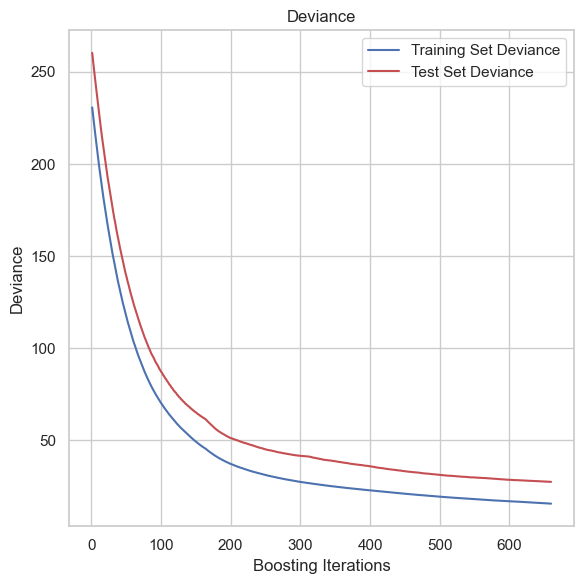

In [157]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbd_reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gbd_reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [158]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1,cols=3, subplot_titles=('MSE', "RMSE", "R2"))

fig.add_bar(x=names, y=mses, row=1, col=1)
fig.add_bar(x=names, y=rmses, row=1, col=2)
fig.add_bar(x=names, y=r2s, row=1, col=3)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'bar',
              'x': [Linear Regression, Linear Regression, Elastic Net Regression,
                    Support Vector Regressor, Support Vector Regressor, Decision
                    Tree Regressor, Random Forest Regressor, XGB Regressor,
                    Gradient Boosting Descent],
              'xaxis': 'x',
              'y': [25.926199928856956, 25.926199928856956, 86.80851594425454,
                    253.28248320828553, 253.28248320828553, 66.54716981132076,
                    25.536435849056595, 28.154432933036794, 27.54666496485828],
              'yaxis': 'y'},
             {'type': 'bar',
              'x': [Linear Regression, Linear Regression, Elastic Net Regression,
                    Support Vector Regressor, Support Vector Regressor, Decision
                    Tree Regressor, Random Forest Regressor, XGB Regressor,
                    Gradient Boosting Descent],
              'xaxis': 'x2',
              'y': [5.091777678655752, 5.091777678655752, 9.317108776023522,
                    15.914851026895775, 15.914851026895775, 8.157644869159283,
                    5.053358868025958, 5.306075096814668, 5.2484916847469885],
              'yaxis': 'y2'},
             {'type': 'bar',
              'x': [Linear Regression, Linear Regression, Elastic Net Regression,
                    Support Vector Regressor, Support Vector Regressor, Decision
                    Tree Regressor, Random Forest Regressor, XGB Regressor,
                    Gradient Boosting Descent],
              'xaxis': 'x3',
              'y': [0.9012923581121233, 0.9012923581121233, 0.6694978852220366,
                    0.035689120750453496, 0.035689120750453496, 0.7466379868853703,
                    0.9027762891670124, 0.8928089079334288, 0.8951228352779107],
              'yaxis': 'y3'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'MSE',
                                'x': 0.14444444444444446,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'RMSE',
                                'x': 0.5,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'R2',
                                'x': 0.8555555555555556,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.2888888888888889]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.35555555555555557, 0.6444444444444445]},
               'xaxis3': {'anchor': 'y3', 'domain': [0.7111111111111111, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 1.0]},
               'yaxis3': {'anchor': 'x3', 'domain': [0.0, 1.0]}}
})

In [159]:
mean_of_popularity = [round(y_train.mean(), 2)] * len(gbd_preds)
random_of_popularity = [random.gauss(mu=y_train.mean(), sigma=y_train.std()) for i in range(len(gbd_preds))]

Text(0.5, 1.0, 'GBM vs True Values')

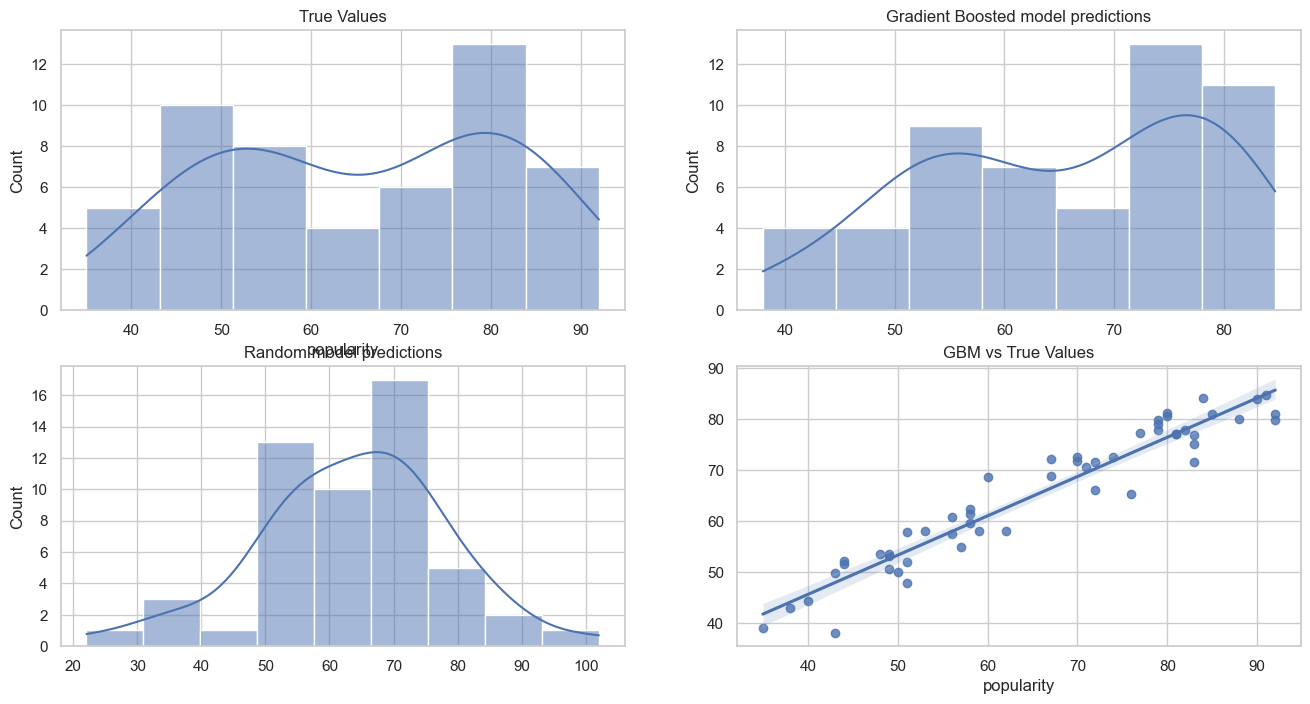

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharey=False, squeeze=False)
sns.histplot(y_test, ax=axes[0,0], kde=True)
sns.histplot(gbd_preds, ax=axes[0,1], kde=True)
sns.histplot(random_of_popularity, ax=axes[1,0], kde=True)
sns.regplot(x=y_test, y=gbd_preds, ax=axes[1,1])
axes[0,0].set_title('True Values')
axes[0,1].set_title('Gradient Boosted model predictions')
axes[1,0].set_title('Random model predictions')
axes[1,1].set_title('GBM vs True Values')

In [161]:
feature_imp = gbd_reg.feature_importances_
features = X_train.columns
rel_imp_df = pd.DataFrame(index=features, data=feature_imp, columns=["importance"]).sort_values(by=['importance'], ascending=False)
rel_imp_df.head(25)
rel_imp_df.reset_index(inplace=True)
rel_imp_df = rel_imp_df.rename(columns={'index': 'feature'})
refined_features = list(rel_imp_df.loc[rel_imp_df['importance'] >= 0.01, 'feature'])

In [163]:
ref_features = [x.replace('_deluxe_edition_', '[deluxe edition]') for x in ref_features]
ref_features = [x.replace(' ', '_') for x in ref_features]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(final_df[ref_features], spotify['popularity'], test_size=0.1, random_state=42)
print("Length of the X_train:", X_train.shape)
print("Length of the y_train:", y_train.shape)
print("Length of the X_test:", X_test.shape)
print("Length of the y_test:", y_test.shape)

Length of the X_train: (477, 9)
Length of the y_train: (477,)
Length of the X_test: (53, 9)
Length of the y_test: (53,)


Text(0.5, 1.0, 'Gradient Boosted (Refined) model predictions')

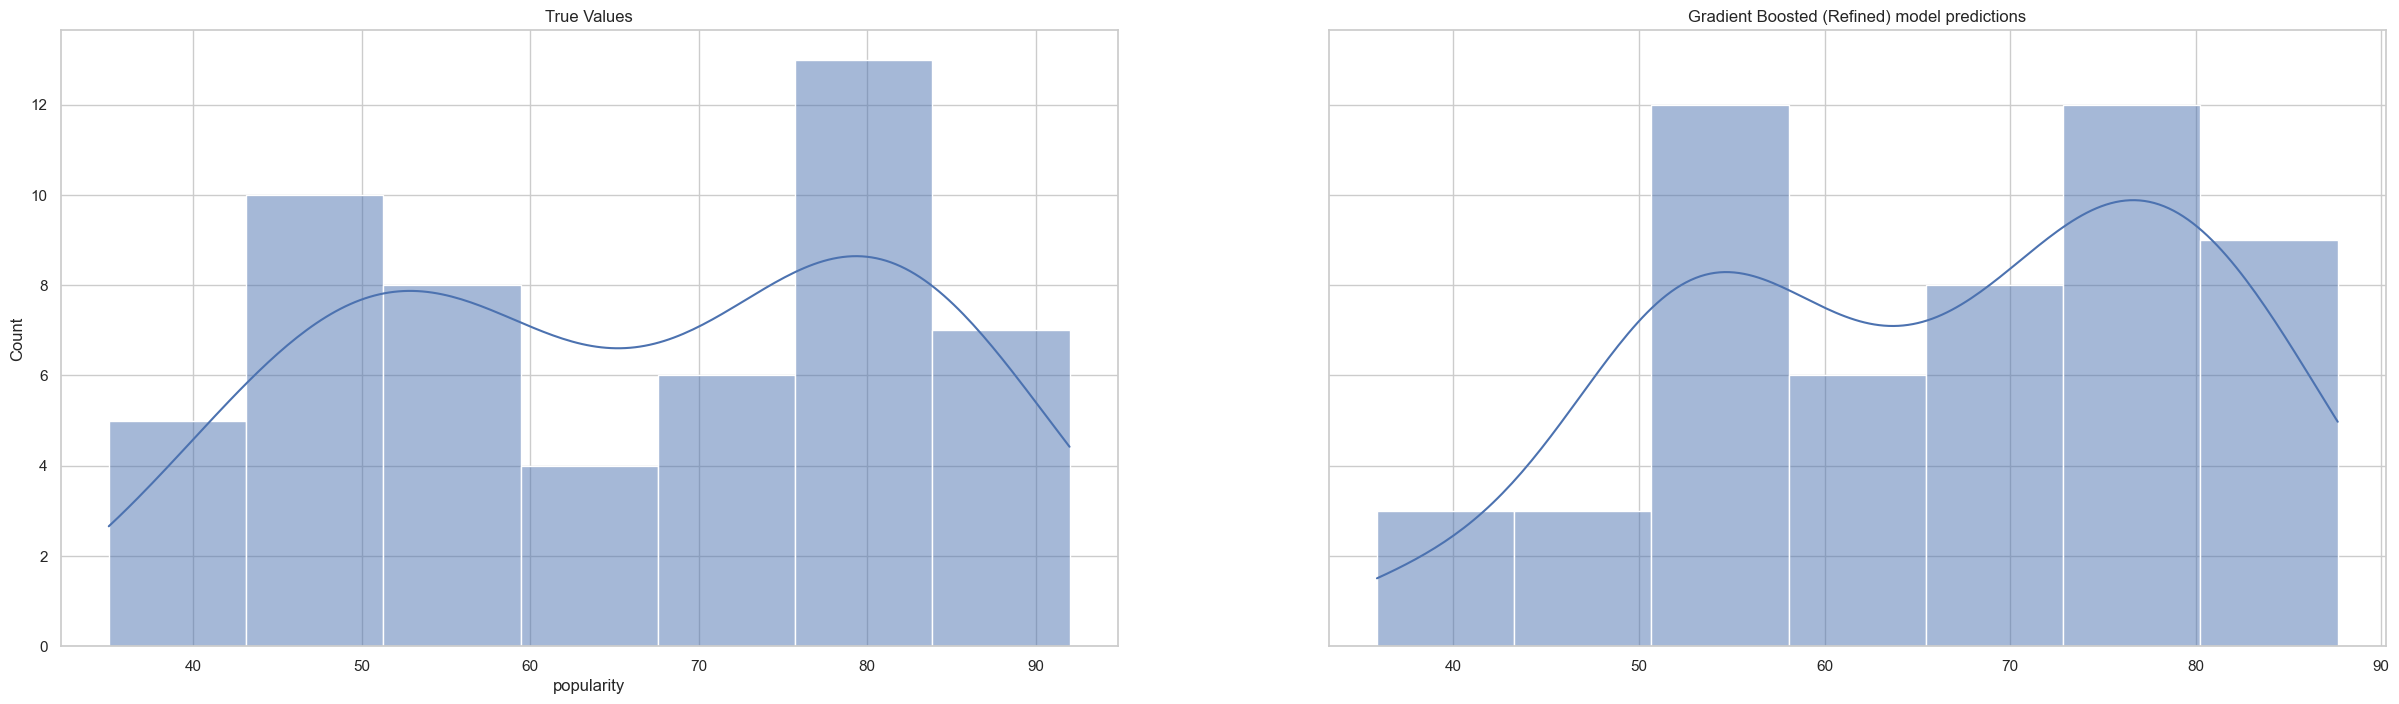

In [168]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,8), sharey=True)

sns.histplot(y_test, ax=axes[0], kde=True)
sns.histplot(gbd_ref_preds, ax=axes[1], kde=True)

axes[0].set_title('True Values')
axes[1].set_title('Gradient Boosted (Refined) model predictions')